## Each Users' Initial Posts and Replies
When the task is to evaluate each student's performance, we need to look at each student's number of initial posts and replies which indicates how engaged are they in the topic.

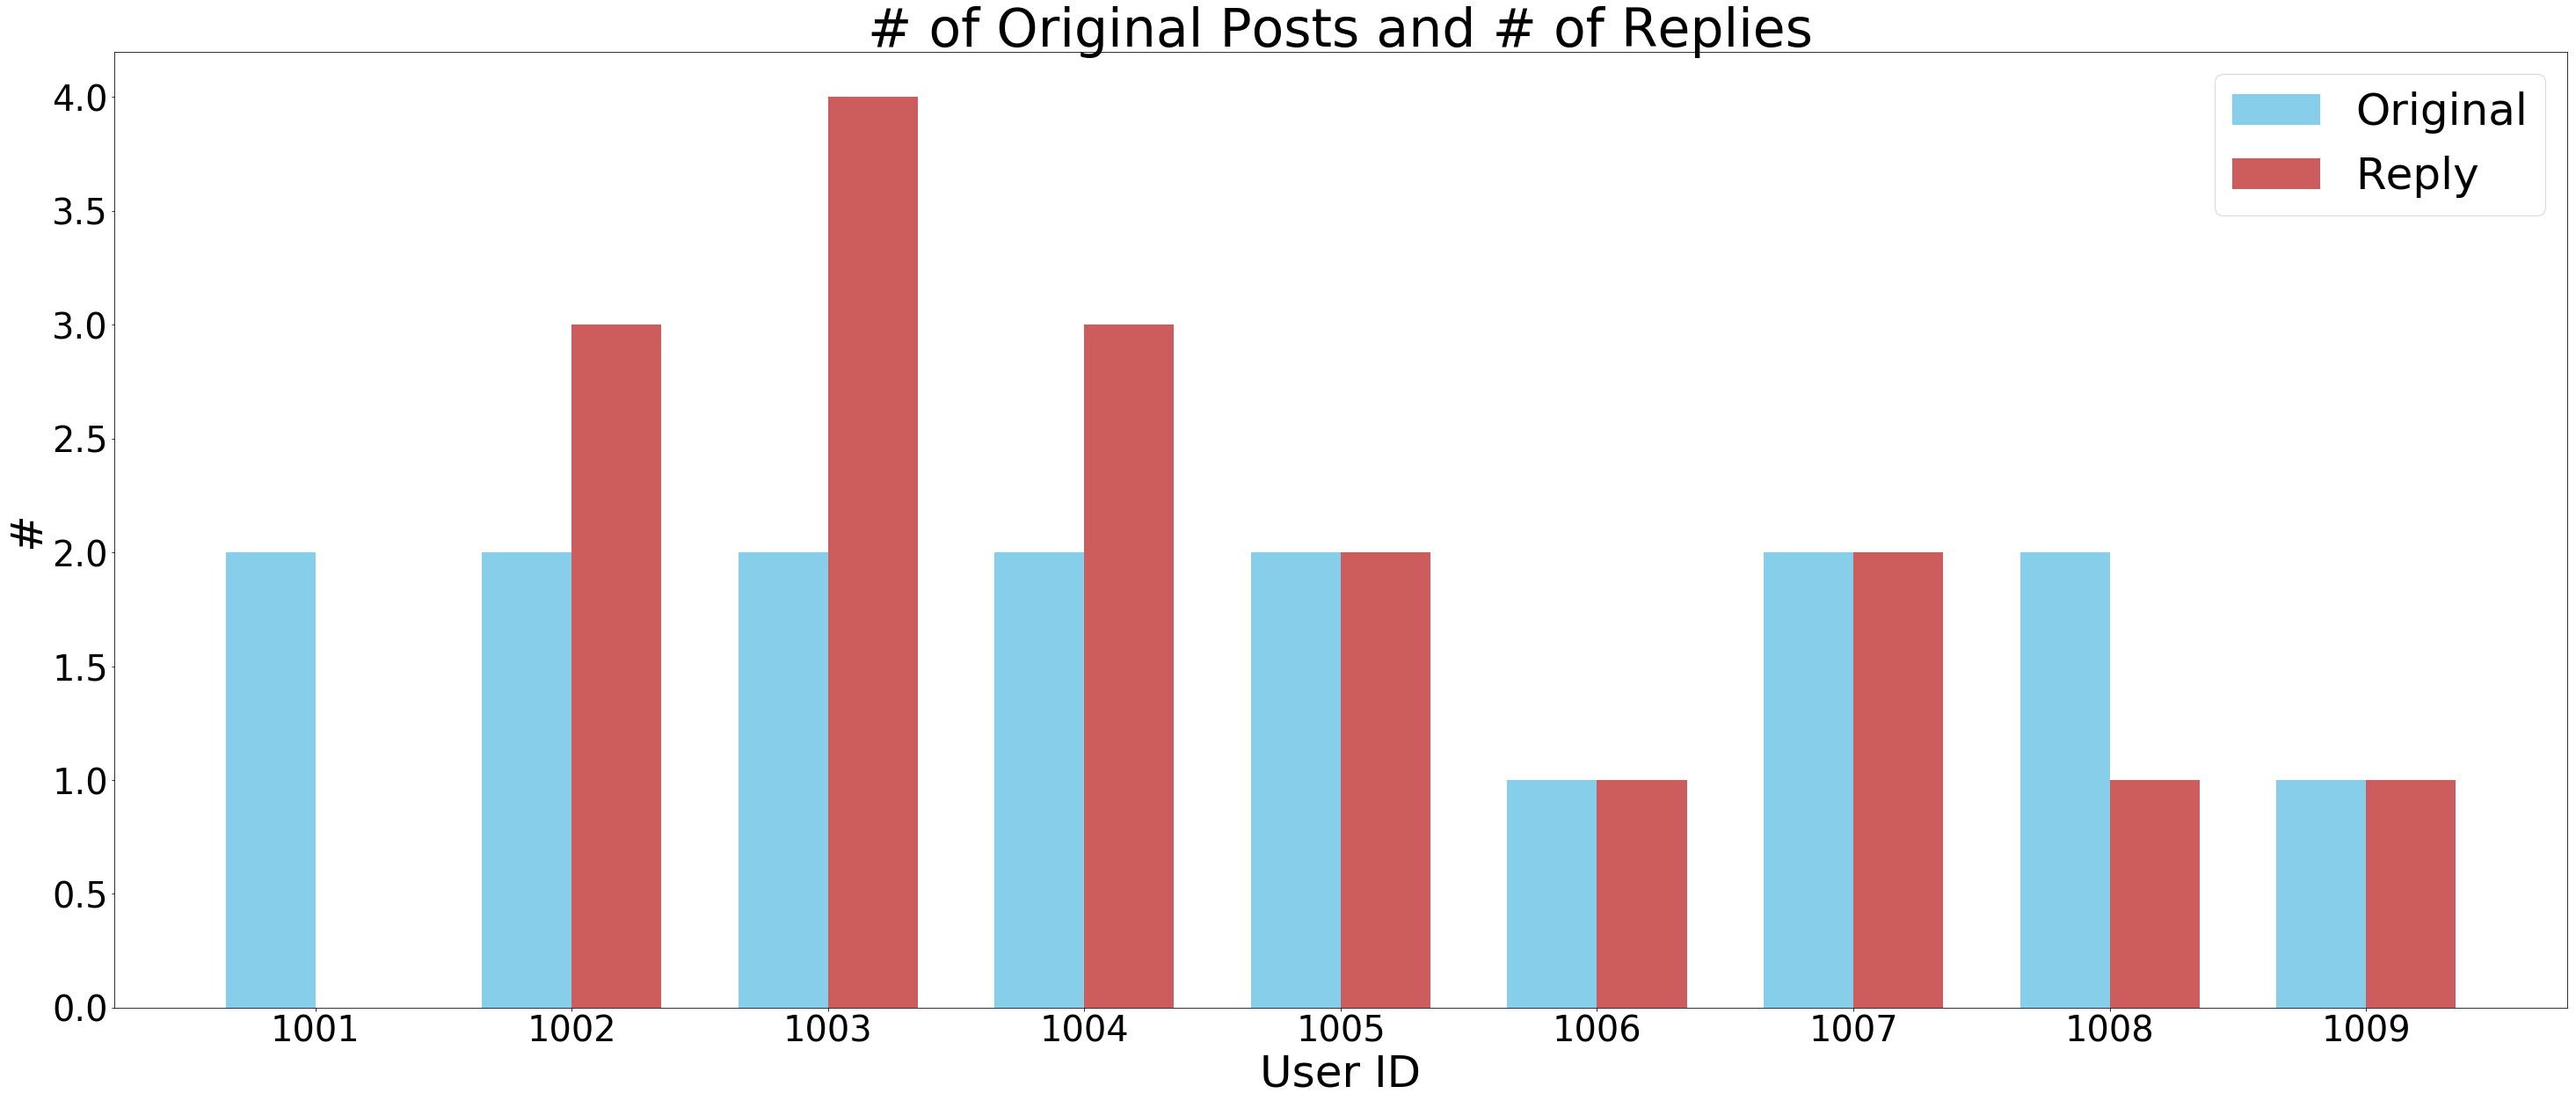

In [19]:
import csv
import collections
data = []
users = []
with open ('2017-1-1-3.csv', newline = '') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(row)
        users.append(row['user'])
users = list(set(users))
users.sort()

original = [0]*len(users)
reply = [0]*len(users)
for i in range(len(users)):
    for j in range(len(data)):
        # original post the parent is empty string
        if users[i] == data[j]['user'] and data[j]['parent'] == '':
            original[i] += 1
        # replies when the parent is not empty string
        if users[i] == data[j]['user'] and data[j]['parent'] != '':
            reply[i] += 1

import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(50, 20))
ind = np.arange(len(original))  # the x locations for the groups
width = 0.35  # the width of the bars
ori = ax.bar(ind - width/2, original, width, color='SkyBlue', label='Original')
re = ax.bar(ind + width/2, reply, width, color='IndianRed', label='Reply')
ax.set_ylabel('#', fontsize=50)
ax.set_xlabel('User ID', fontsize=50)
ax.set_title('# of Original Posts and # of Replies', fontsize=60)
ax.set_xticks(ind)
ax.tick_params(axis='y', labelsize=40)
ax.set_xticklabels(users, fontsize=40)
ax.legend(fontsize=50)
plt.show()

## Each Post's Correlation Between # of Char and # of Replies
When trying to determine if there is a correlation between the number of text chars and the number of repiles it got, we need to look at the scatterplot with those two variables on x and y axis.

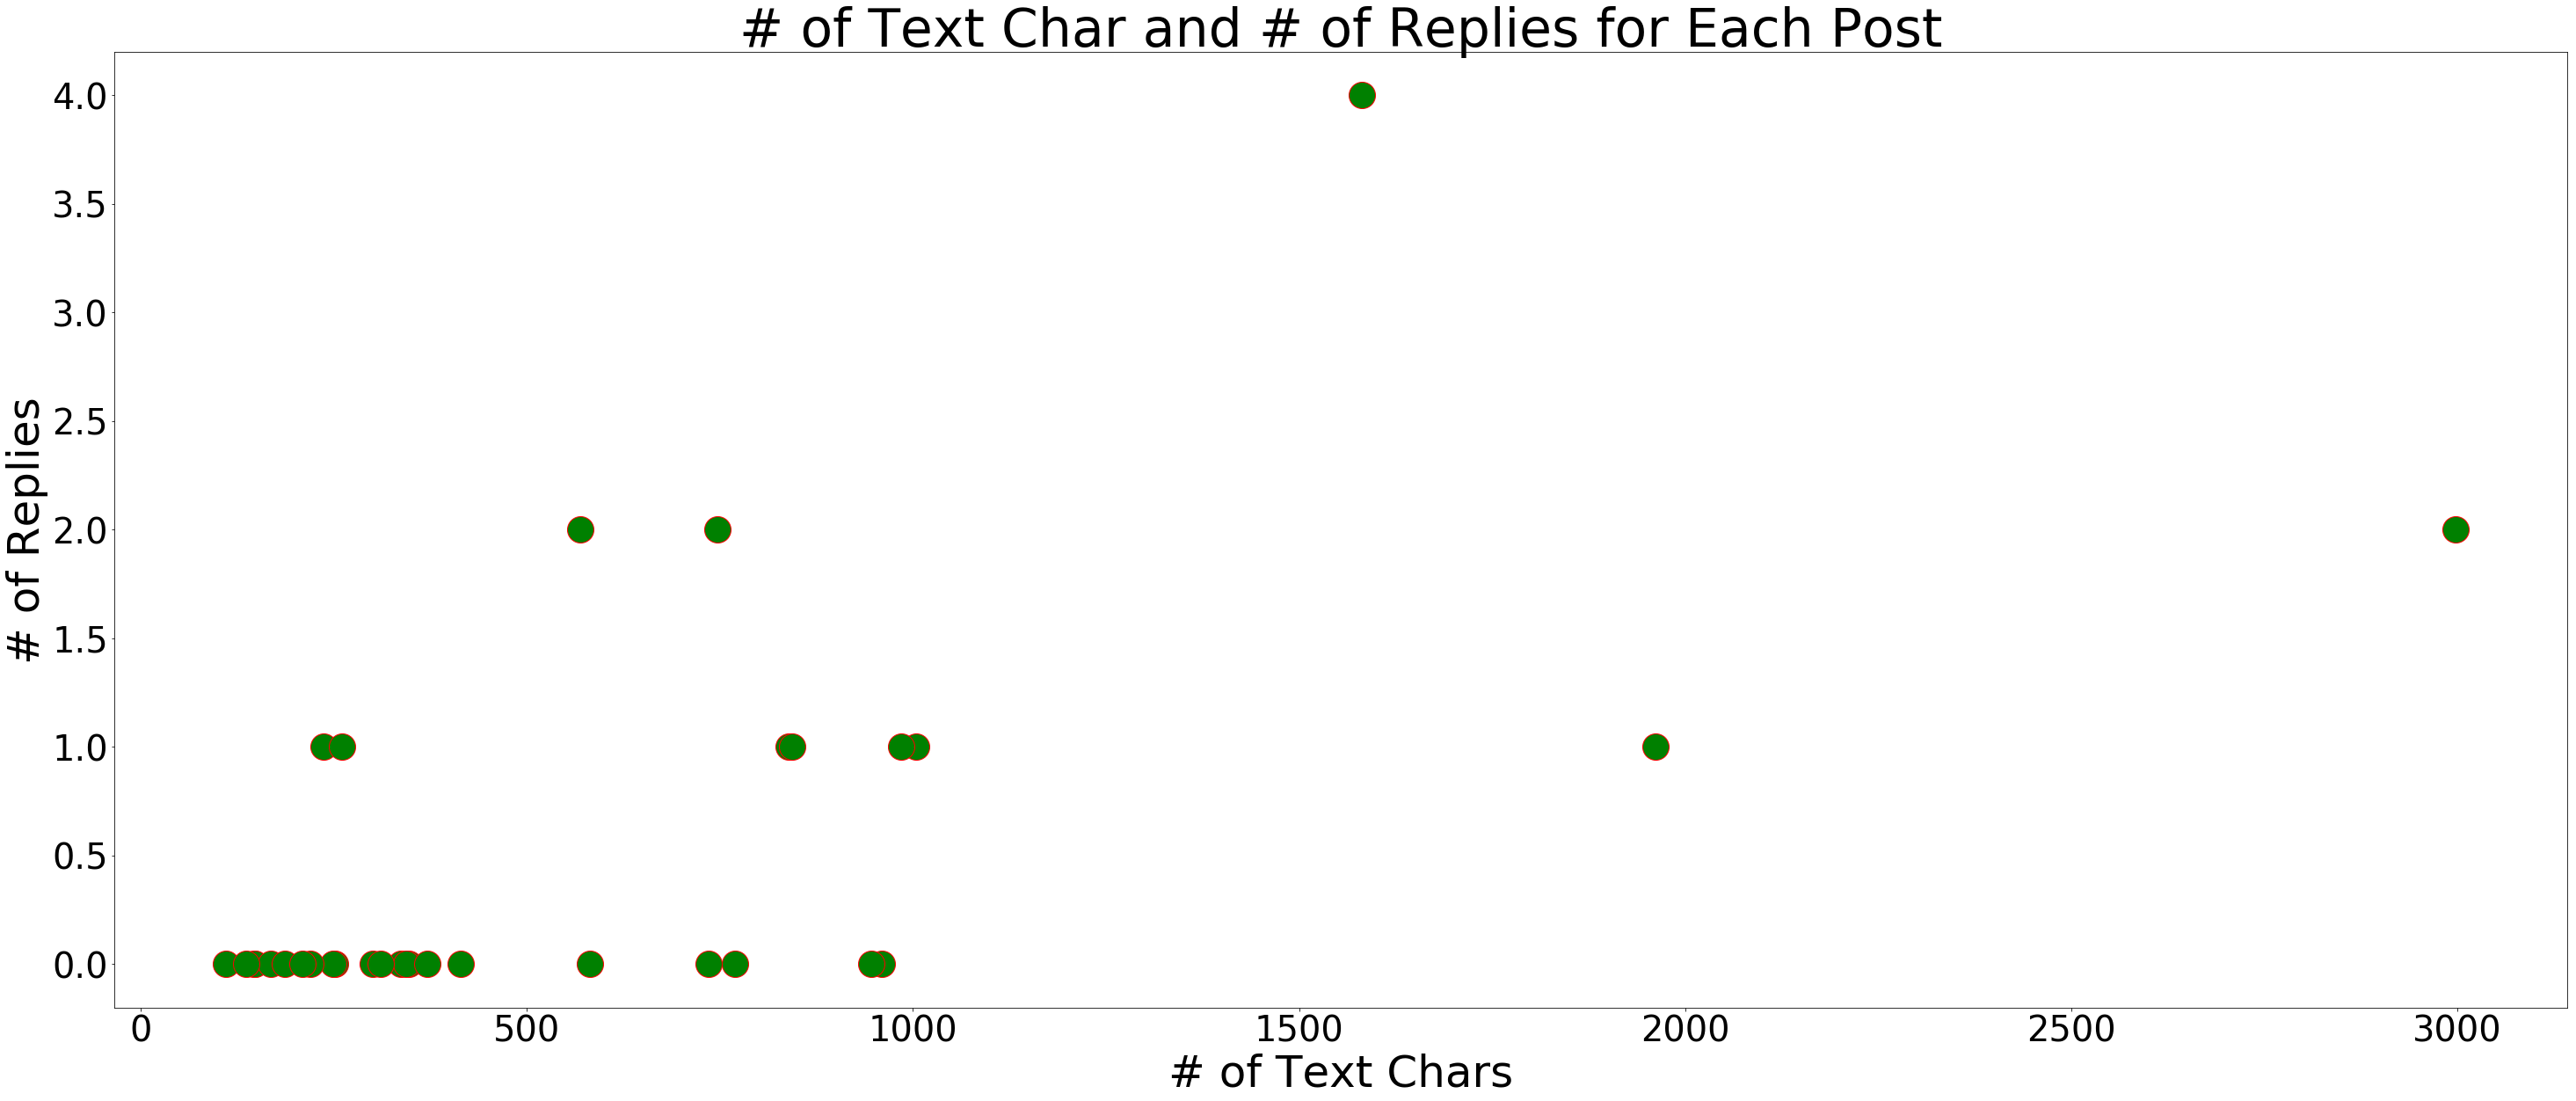

In [20]:
post_id = []
num_char = []
num_children = []
for i in range(len(data)):
    post_id.append(data[i]['id'])
    num_char.append(data[i]['textchars'])
    num_children.append(data[i]['numChildren'])

num_char = list(map(int, num_char))
num_children = list(map(int, num_children))
fig, l = plt.subplots(figsize=(50, 20))
ax = plt.plot(num_char, num_children, 'ro')
l.set_title('# of Text Char and # of Replies for Each Post', fontsize=60)
l.set_ylabel('# of Replies', fontsize=50)
l.set_xlabel('# of Text Chars', fontsize=50)
l.tick_params(axis='x', labelsize=40)
l.tick_params(axis='y', labelsize=40)
plt.setp(ax, markersize=30)
plt.setp(ax, markerfacecolor='Green')

plt.show()

## When Do People Write Their Posts?
When trying to figure out how many posts are posted on each day, we need to look at a bar chart.

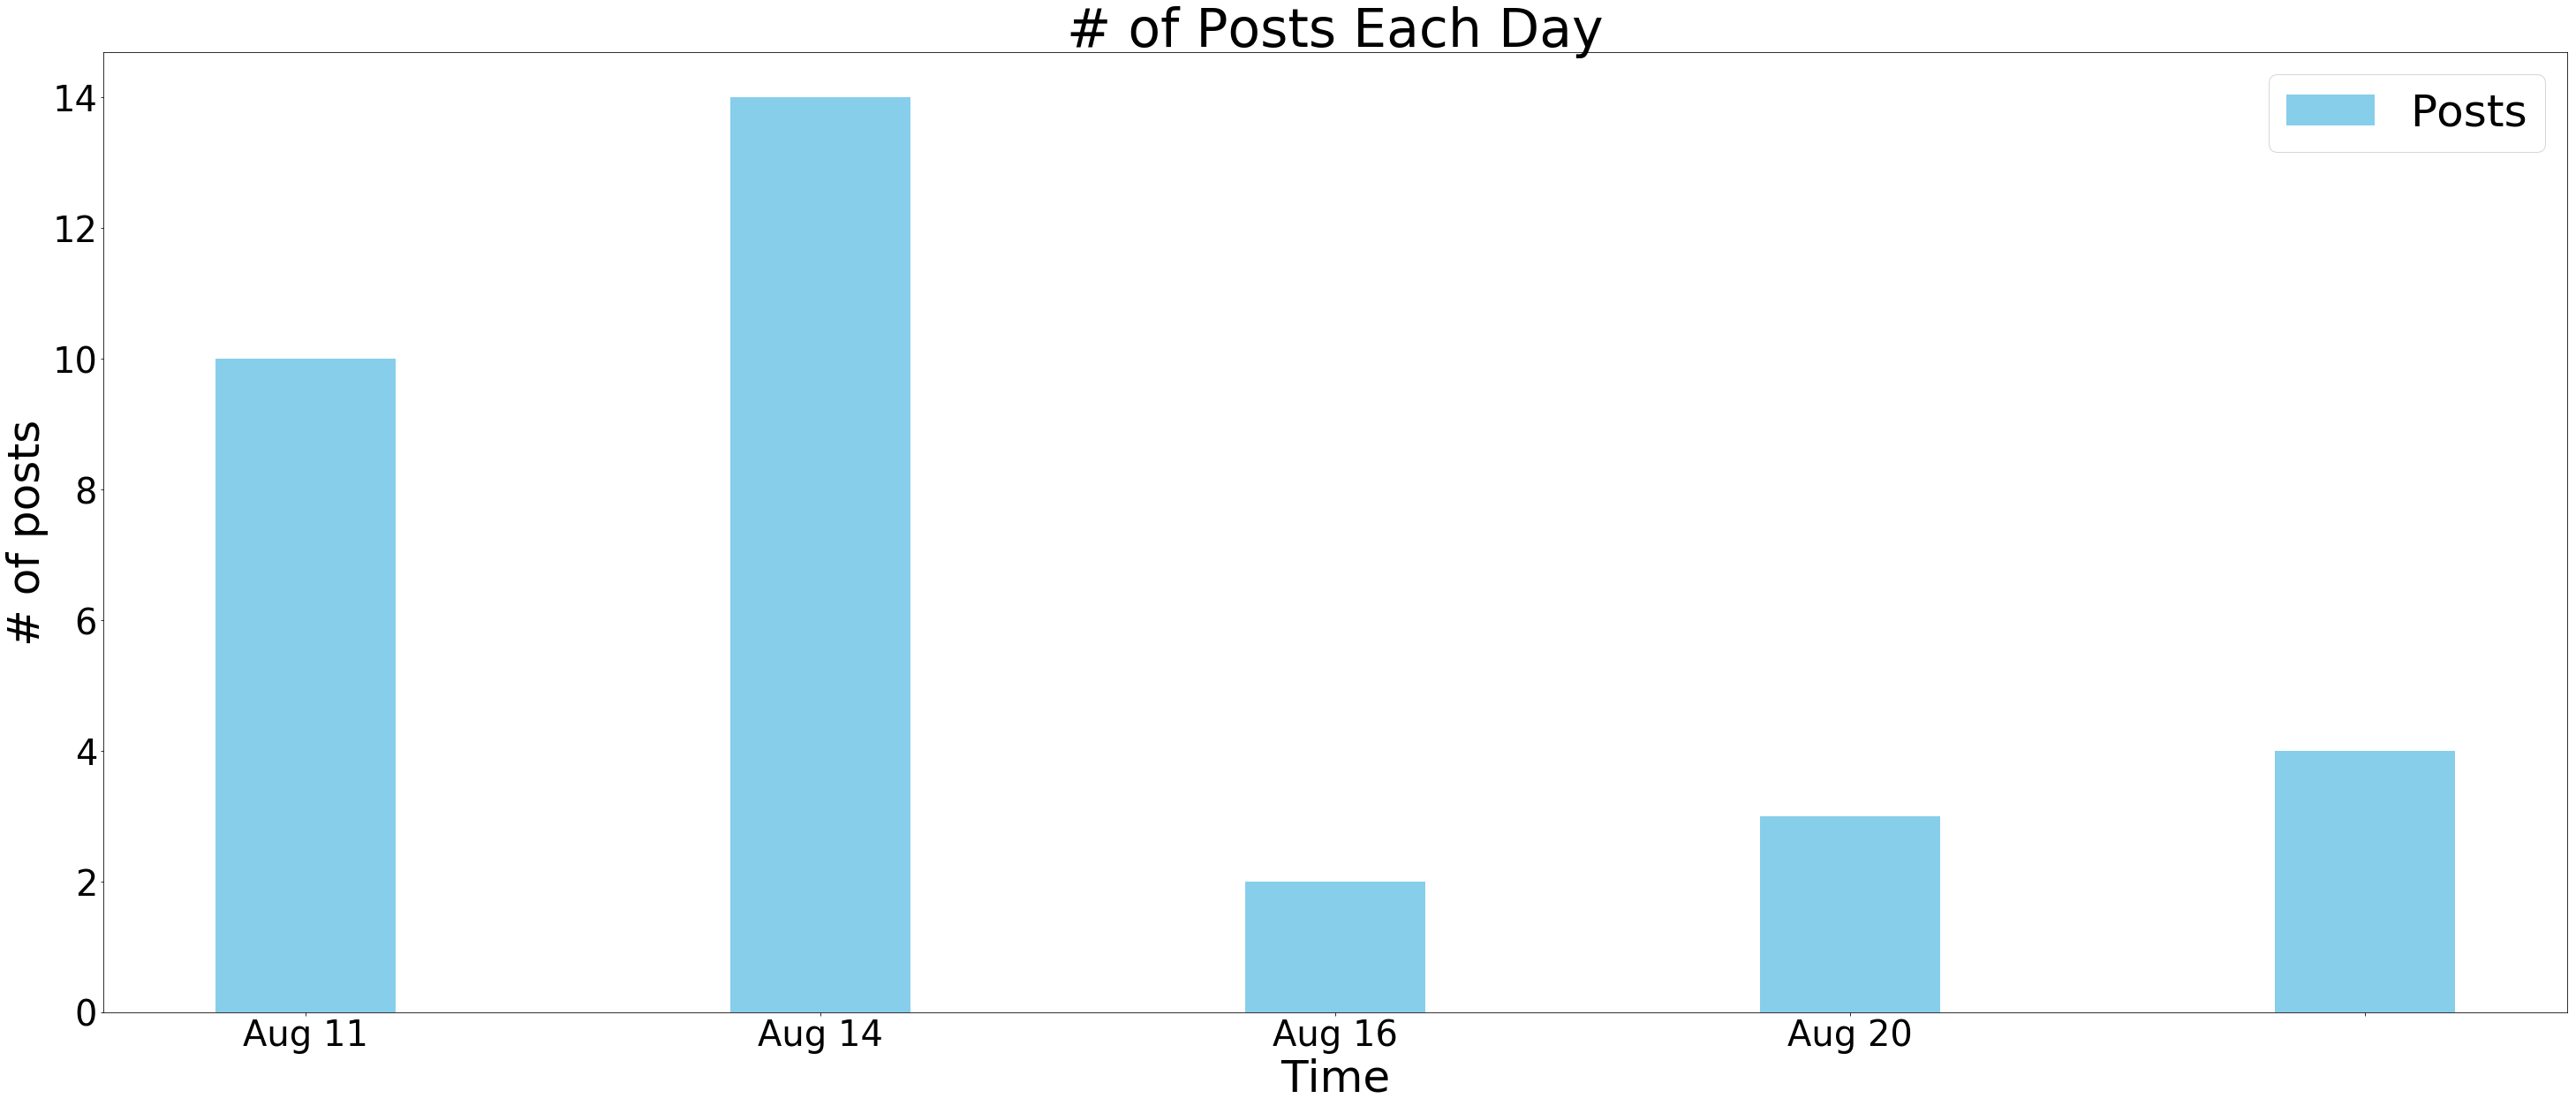

In [21]:
time = []
for row in data:
    tmp = row['time']
    tmp = tmp[8:10]
    time.append(int(tmp))
time = list(set(time))
cnt = [0]*len(time)
for i in range(len(time)):
    for row in data:
        if int(row['time'][8:10]) == time[i]:
            cnt[i] += 1
for i in range(len(time)):
    time[i] = "Aug " + str(time[i])
    
fig, b = plt.subplots(figsize=(50, 20))
width = 0.35  # the width of the bars
ind = np.arange(len(time))  # the x locations for the groups
counts = plt.bar(ind, cnt, width, color='SkyBlue', label='Posts')
b.set_ylabel('# of posts', fontsize=50)
b.set_xlabel('Time', fontsize=50)
b.set_title('# of Posts Each Day', fontsize=60)
b.tick_params(axis='y', labelsize=40)
b.set_xticklabels(time, fontsize=40)
b.legend(fontsize=50)
plt.show()